## Plots for NJIT meeting

In [43]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib
import os
import random
from matplotlib.lines import Line2D
import colorsys
import platform
from pathlib import Path
from matplotlib import colors
#import readFiles
import src.readFiles as readFiles
import pandas as pd

# Matplotlib rc parameters modification
plt.rcParams.update({
  "figure.max_open_warning" : 0,
  "text.usetex"             : True,
  "text.latex.preamble"     : r"\usepackage{amsmath, bm, type1cm}",  # Added \bm for bold math
  "figure.autolayout"       : True,
  "font.family"             : "STIXGeneral",
  "mathtext.fontset"        : "stix",
  "font.size"               : 8,
  "xtick.labelsize"         : 8,
  "ytick.labelsize"         : 8,
  "lines.linewidth"         : 1,
  "lines.markersize"        : 5,
})
#plt.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'

colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']

fig_width = 7.05826  #inches

if platform.system() == 'Darwin':  # macOS
    topDir = Path("/Volumes/rahul_2TB/high_bidispersity/new_data/")
    fig_save_path = Path("/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/mrig")
elif platform.system() == 'Linux':
    topDir = Path("/media/rahul/rahul_2TB/high_bidispersity/new_data/")
    fig_save_path = Path("/home/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/mrig")
else:
    raise OSError("Unsupported OS")

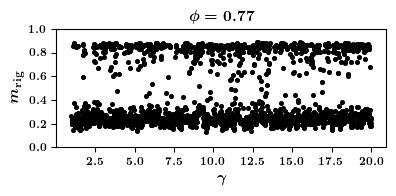

In [50]:
# Parameters
npp = 1000
phi = '0.77'
arr = '1.4'  # 1.0 is a separate case
vrr = '0.5'
run = 1
off = 100

# Plotting other cases

fig, ax = plt.subplots(1,1, figsize=(4,2))

#phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
workDir   = f"{topDir}/NP_{npp}/phi_{phi}/ar_{arr}/Vr_{vrr}/run_{run}/"
if os.path.exists(workDir):
    dataFile = glob.glob(workDir+"data_*.dat")[0]
    data     = np.loadtxt(dataFile)
    strain   = data[off:, 1]
    visc     = data[off:, 3]
    pp       = data[off:, 8]/data[off:, 2]
    
    frigFile = workDir + "F_rig.txt"
    #print(frigFile)
    frig     = np.loadtxt(frigFile)/ npp
    
    ax.scatter(strain, frig[off:], s=7, c='black')

plt.ylim(0,1)
plt.xlabel(r'$\gamma$', fontsize=11)
plt.ylabel(r'$m_{\rm rig}$', fontsize=11)
plt.title(fr'$\phi = {phi}$', fontsize=11)

plt.savefig(f'{fig_save_path}/mrig_{phi}.pdf', bbox_inches="tight",pad_inches=0, dpi=800)
plt.show()

In [32]:
frigFile = workDir + "F_rig.txt"
frigFile

'/Volumes/rahul_2TB/high_bidispersity/new_data/NP_1000/phi_0.77/ar_1.4x/Vr_0.5/run_1/F_rig.txt'

In [24]:
#import sys
# path where supporting files exist
# sys.path.append('/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/myLibrary/rigCalc')
# sys.path.append('/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/myLibrary/rigCalc')
# import myFunctions    # type: ignore
# import FilesGenerator # type: ignore

import src.rigCalc.myFunctions    as myFunctions     # type: ignore
import src.rigCalc.FilesGenerator as FilesGenerator  # type: ignore
import os
import glob

'''
Feb 6 2025
RVP

This script creates Frig, rig_*.dat files if missing and also rigPrime files if missing
The above mentioned files are required for snapshots
'''
outputVar = 'gamma'   # it can either be 't' or 'gamma' (check it in your parameters file)

npp = 1000
phi = '0.78'
ar  = '1.4x'
vr  = '0.5'
run = 1

frigFile = 'F_rig.txt' 
rigFile  = 'rig_*.dat' 
    

datname  = f"{topDir}/NP_{npp}/phi_{phi}/ar_{ar}/Vr_{vr}/run_{run}/"
if os.path.exists(datname):
    rigPath  = glob.glob(f'{datname}{rigFile}')
    frigPath = f'{datname}{frigFile}'
    if len(rigPath) == 0  or not os.path.exists(frigPath):
        print('')
        print(f'NP = {npp}, phi = {phi}, ar = {ar}, vr = {vr}, run = {run}')
        workingFileName = datname + '00_OngoingFileGenerator.txt'
        
        workingFile = open(workingFileName, "w")       
        workingFile.write('This is just a file to indicate that the some work is going on in this directory.\n')
        workingFile.close()
        t_SS = 0 #steadyStateTime.t_SS(i,j,k)
        FilesGenerator.filesGeneratorOneRun(npp, float(phi), datname, t_SS, 't', makeMovies=False)
        os.remove(workingFileName)
    else:
        print('  >> rigdity files already exist for this case  >>  SKIPPING')

#     rigPrimeFile = f'{datname}rigPrime.txt'
#     if not os.path.exists(rigPrimeFile):
#         print('  >> The prime rigdity files being generated')
#         workingFileName = datname + '01_OngoingFileGenerator.txt'
#         workingFile = open(workingFileName, "w")       
#         workingFile.write('This is just a file to indicate that the prime rigidity files are being generated in this directory.\n')
#         workingFile.close()
#         myFunctions.myPrimeRigidClusters(datname)
#         os.remove(workingFileName)
#         print(f' >> prime rig file generated for - phi_{phi}/ar_{ar}/Vr_{vr}/run_{run}')
#     else:
#         #print('  >> The prime rigdity files already exist for this case  >>  SKIPPING')
#         print(f' >> prime rigdity files already exist - phi_{phi}/ar_{ar}/Vr_{vr}/run_{run}')

else:
    print(f'directory not found - {topDir}/NP_{npp}/phi_{phi}/ar_{ar}/Vr_{vr}/run_{run}/')


NP = 1000, phi = 0.78, ar = 1.4x, vr = 0.5, run = 1
  >> computing rigid clusters
numSnapshots =  225
Contact and position data has been converted from the LF_DEM format to the format needed to play the pebble game.  Starting pebble game calculations now!
upperSnapShotRange =  225
We are running a (3,3) game.
3
6
Sizes of full contact objects:6
Modified pebble games (2nd neighbours, or single contacts, or deleted contacts). Not implemented yet, please construct new functions similar to AddFrictionalBonds(conf) to modify contact lists.
Statistics:
Number of free pebbles: 2994
Number of failed contacts: 0
Cluster sizes (particles)
[]
Cluster sizes (bonds)
[]
Cluster labels
[]
We are running a (3,3) game.
51
102
Sizes of full contact objects:102
Modified pebble games (2nd neighbours, or single contacts, or deleted contacts). Not implemented yet, please construct new functions similar to AddFrictionalBonds(conf) to modify contact lists.
Statistics:
Number of free pebbles: 2898
Number of f

Cluster length 4
Cluster length 3
Cluster length 5
WARNING!! Attempting to relabel a *bond* from 14.0
Cluster length 6
WARNING!! Attempting to relabel a *bond* from 5.0
Cluster length 5
Cluster length 5
Cluster sizes (particles)
[3, 3, 3, 5, 5, 4, 3, 6, 6, 3, 7, 8, 3, 3, 4, 3, 5, 6, 5, 5]
Cluster sizes (bonds)
[6, 6, 6, 12, 12, 10, 6, 16, 14, 6, 18, 22, 6, 6, 8, 6, 12, 16, 12, 12]
Cluster labels
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, np.float64(9.0), np.float64(8.0), 12, 13, 14, 15, np.float64(14.0), np.float64(5.0), 18, 19]
We are running a (3,3) game.
1255
2510
Sizes of full contact objects:2510
Modified pebble games (2nd neighbours, or single contacts, or deleted contacts). Not implemented yet, please construct new functions similar to AddFrictionalBonds(conf) to modify contact lists.
Statistics:
Number of free pebbles: 495
Number of failed contacts: 5
Cluster length 7
Cluster length 14
Cluster length 3
Cluster length 29
Cluster length 9
Cluster length 4
Cluster length 8
Cluster length 5
Cl

Cluster length 8
Cluster length 3
Cluster length 19
WARNING!! Attempting to relabel a *bond* from 1.0
Cluster length 3
Cluster length 5
Cluster length 20
Cluster length 3
Cluster length 9
Cluster length 3
Cluster length 4
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 5
Cluster length 3
Cluster length 7
Cluster length 3
Cluster length 9
Cluster length 3
Cluster length 7
WARNING!! Attempting to relabel a *bond* from 8.0
Cluster length 3
Cluster length 3
Cluster length 5
Cluster length 3
Cluster length 3
Cluster length 5
Cluster length 5
Cluster length 3
Cluster length 9
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 3
Cluster sizes (particles)
[5, 10, 8, 3, 19, 3, 5, 20, 3, 9, 3, 4, 3, 3, 3, 5, 3, 7, 3, 9, 3, 7, 3, 3, 5, 3, 3, 5, 5, 3, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Cluster sizes (bonds)
[12, 26, 22, 6, 56, 6, 12, 58, 6, 26, 6, 10, 6, 6, 6, 12, 6, 18, 6, 24, 6, 18, 6

Cluster length 3
Cluster length 9
WARNING!! Attempting to relabel a *bond* from 8.0
Cluster length 3
Cluster length 3
Cluster length 13
WARNING!! Attempting to relabel a *bond* from 18.0
Cluster length 5
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 3
Cluster sizes (particles)
[8, 3, 3, 5, 23, 5, 3, 78, 6, 11, 6, 5, 7, 7, 3, 3, 4, 6, 9, 5, 6, 3, 10, 6, 3, 9, 3, 3, 13, 5, 3, 3, 3, 3, 3, 3, 3, 3]
Cluster sizes (bonds)
[18, 6, 6, 12, 66, 12, 6, 236, 12, 30, 16, 12, 18, 18, 6, 6, 10, 16, 24, 12, 18, 6, 28, 20, 6, 24, 6, 6, 36, 12, 6, 6, 6, 6, 6, 6, 6, 6]
Cluster labels
[0, 1, 2, 3, 4, 5, 6, 7, 8, np.float64(0.0), 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, np.float64(10.0), 24, np.float64(8.0), 26, 27, np.float64(18.0), 29, 30, 31, 32, 33, 34, 35, 36, 37]
We are running a (3,3) game.
1260
2520
Sizes of full contact objects:2520
Modified pebble games (2nd neighbours, or single contacts, or delete

Statistics:
Number of free pebbles: 358
Number of failed contacts: 38
Cluster length 835
Cluster sizes (particles)
[835]
Cluster sizes (bonds)
[2540]
Cluster labels
[0]
We are running a (3,3) game.
1302
2604
Sizes of full contact objects:2604
Modified pebble games (2nd neighbours, or single contacts, or deleted contacts). Not implemented yet, please construct new functions similar to AddFrictionalBonds(conf) to modify contact lists.
Statistics:
Number of free pebbles: 414
Number of failed contacts: 18
Cluster length 853
Cluster sizes (particles)
[853]
Cluster sizes (bonds)
[2574]
Cluster labels
[0]
We are running a (3,3) game.
1295
2590
Sizes of full contact objects:2590
Modified pebble games (2nd neighbours, or single contacts, or deleted contacts). Not implemented yet, please construct new functions similar to AddFrictionalBonds(conf) to modify contact lists.
Statistics:
Number of free pebbles: 424
Number of failed contacts: 14
Cluster length 3
Cluster length 6
Cluster length 5
Clust

Cluster length 819
Cluster sizes (particles)
[819]
Cluster sizes (bonds)
[2486]
Cluster labels
[0]
We are running a (3,3) game.
1325
2650
Sizes of full contact objects:2650
Modified pebble games (2nd neighbours, or single contacts, or deleted contacts). Not implemented yet, please construct new functions similar to AddFrictionalBonds(conf) to modify contact lists.
Statistics:
Number of free pebbles: 400
Number of failed contacts: 50
Cluster length 855
Cluster sizes (particles)
[855]
Cluster sizes (bonds)
[2612]
Cluster labels
[0]
We are running a (3,3) game.
1299
2598
Sizes of full contact objects:2598
Modified pebble games (2nd neighbours, or single contacts, or deleted contacts). Not implemented yet, please construct new functions similar to AddFrictionalBonds(conf) to modify contact lists.
Statistics:
Number of free pebbles: 417
Number of failed contacts: 15
Cluster length 59
Cluster length 15
Cluster length 5
Cluster length 3
Cluster length 6
Cluster length 3
Cluster length 4
Clust

Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 5
WARNING!! Attempting to relabel a *bond* from 25.0
Cluster length 3
Cluster sizes (particles)
[20, 12, 17, 7, 5, 7, 30, 4, 3, 14, 9, 5, 4, 5, 3, 4, 18, 3, 4, 3, 3, 4, 3, 5, 7, 4, 3, 5, 4, 3, 3, 3, 5, 3, 4, 5, 4, 3, 3, 3, 3, 5, 3]
Cluster sizes (bonds)
[60, 36, 48, 18, 12, 18, 88, 10, 6, 42, 24, 12, 8, 12, 6, 10, 52, 6, 8, 6, 6, 10, 6, 12, 18, 10, 6, 14, 10, 6, 6, 6, 12, 6, 8, 12, 10, 6, 6, 6, 6, 14, 6]
Cluster labels
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, np.float64(12.0), 24, 25, 26, 27, 28, 29, 30, 31, np.float64(18.0), 33, 34, np.float64(34.0), 36, 37, 38, 39, 40, np.float64(25.0), 42]
We are running a (3,3) game.
1322
2644
Sizes of full contact objects:2644
Modified pebble games (2nd neighbours, or single contacts, or deleted contacts). Not implemented yet, please construct new functions similar to AddFrictionalBonds(conf) to modify contact lists.
Statist

Cluster length 13
WARNING!! Attempting to relabel a *bond* from 1.0
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 5
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 3
Cluster sizes (particles)
[29, 10, 7, 7, 11, 8, 6, 11, 7, 7, 3, 4, 3, 12, 8, 3, 5, 3, 18, 3, 3, 3, 3, 3, 4, 5, 3, 3, 3, 3, 4, 3, 3, 9, 3, 13, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Cluster sizes (bonds)
[84, 26, 20, 16, 26, 20, 16, 30, 18, 20, 6, 10, 6, 34, 40, 6, 12, 6, 52, 6, 6, 6, 6, 6, 10, 12, 6, 6, 6, 6, 10, 6, 6, 24, 6, 36, 6, 6, 6, 12, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
Cluster labels
[0, 1, 2, 3, 4, 5, 6, np.float64(5.0), 8, 9, 10, 11, 12, 13, np.float64(4.0), 15, 16, 17, np.float64(4.0), 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, np.float64(3.0), 34, np.float64(1.0), 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
We are running a (3,3) game.
1302
2604
Sizes

Statistics:
Number of free pebbles: 399
Number of failed contacts: 67
Cluster length 864
Cluster sizes (particles)
[864]
Cluster sizes (bonds)
[2656]
Cluster labels
[0]
We are running a (3,3) game.
1350
2700
Sizes of full contact objects:2700
Modified pebble games (2nd neighbours, or single contacts, or deleted contacts). Not implemented yet, please construct new functions similar to AddFrictionalBonds(conf) to modify contact lists.
Statistics:
Number of free pebbles: 370
Number of failed contacts: 70
Cluster length 871
Cluster sizes (particles)
[871]
Cluster sizes (bonds)
[2680]
Cluster labels
[0]
We are running a (3,3) game.
1341
2682
Sizes of full contact objects:2682
Modified pebble games (2nd neighbours, or single contacts, or deleted contacts). Not implemented yet, please construct new functions similar to AddFrictionalBonds(conf) to modify contact lists.
Statistics:
Number of free pebbles: 397
Number of failed contacts: 79
Cluster length 864
Cluster sizes (particles)
[864]
Clust

Cluster length 7
Cluster length 3
Cluster length 6
Cluster length 4
Cluster length 4
Cluster length 3
Cluster length 4
Cluster length 7
WARNING!! Attempting to relabel a *bond* from 1.0
Cluster length 4
Cluster length 4
WARNING!! Attempting to relabel a *bond* from 31.0
Cluster length 3
Cluster length 3
Cluster sizes (particles)
[52, 6, 4, 5, 10, 3, 9, 3, 13, 4, 11, 3, 7, 5, 7, 3, 3, 3, 3, 5, 5, 3, 3, 7, 4, 3, 5, 7, 3, 6, 4, 4, 3, 4, 7, 4, 4, 3, 3]
Cluster sizes (bonds)
[156, 14, 10, 12, 28, 6, 26, 6, 36, 10, 30, 6, 18, 12, 18, 6, 6, 6, 6, 12, 12, 6, 6, 20, 10, 6, 12, 18, 6, 16, 10, 8, 6, 10, 18, 10, 12, 6, 6]
Cluster labels
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, np.float64(13.0), 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, np.float64(18.0), 27, 28, 29, 30, 31, 32, 33, np.float64(1.0), 35, np.float64(31.0), 37, 38]
We are running a (3,3) game.
1335
2670
Sizes of full contact objects:2670
Modified pebble games (2nd neighbours, or single contacts, or deleted contacts). Not implem

Cluster length 4
WARNING!! Attempting to relabel a *bond* from 6.0
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 4
Cluster length 3
Cluster length 5
WARNING!! Attempting to relabel a *bond* from 4.0
Cluster sizes (particles)
[7, 3, 24, 5, 3, 3, 5, 8, 7, 9, 14, 5, 8, 14, 5, 3, 3, 5, 10, 4, 7, 3, 3, 3, 9, 3, 3, 3, 4, 3, 5, 3, 4, 3, 3, 3, 4, 3, 5]
Cluster sizes (bonds)
[18, 6, 70, 12, 6, 6, 12, 22, 18, 26, 40, 12, 22, 40, 12, 6, 6, 12, 28, 8, 18, 6, 6, 6, 24, 6, 6, 6, 10, 6, 12, 6, 16, 6, 6, 6, 10, 6, 12]
Cluster labels
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, np.float64(19.0), 31, np.float64(6.0), 33, 34, 35, 36, 37, np.float64(4.0)]
We are running a (3,3) game.
1254
2508
Sizes of full contact objects:2508
Modified pebble games (2nd neighbours, or single contacts, or deleted contacts). Not implemented yet, please construct new functions similar to AddFrictionalBonds(conf) to modify contact lists.
St

Cluster length 5
Cluster length 10
WARNING!! Attempting to relabel a *bond* from 10.0
Cluster length 3
Cluster length 3
Cluster length 13
WARNING!! Attempting to relabel a *bond* from 10.0
Cluster length 3
Cluster length 6
WARNING!! Attempting to relabel a *bond* from 26.0
Cluster length 5
WARNING!! Attempting to relabel a *bond* from 6.0
Cluster sizes (particles)
[10, 5, 3, 7, 7, 5, 3, 6, 13, 26, 9, 5, 23, 9, 8, 5, 14, 5, 14, 9, 9, 3, 3, 3, 6, 5, 5, 5, 5, 3, 3, 9, 7, 3, 3, 4, 3, 9, 4, 5, 10, 3, 3, 13, 3, 6, 5]
Cluster sizes (bonds)
[28, 12, 6, 16, 18, 12, 6, 16, 36, 80, 24, 12, 70, 24, 26, 12, 40, 12, 40, 24, 24, 6, 6, 6, 16, 12, 12, 10, 12, 6, 6, 24, 18, 6, 6, 10, 6, 24, 10, 12, 30, 6, 6, 36, 6, 16, 12]
Cluster labels
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, np.float64(3.0), 15, 16, 17, np.float64(3.0), 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, np.float64(27.0), 38, 39, np.float64(10.0), 41, 42, np.float64(10.0), 44, np.float64(26.0), np.float64(6.

We are running a (3,3) game.
1310
2620
Sizes of full contact objects:2620
Modified pebble games (2nd neighbours, or single contacts, or deleted contacts). Not implemented yet, please construct new functions similar to AddFrictionalBonds(conf) to modify contact lists.
Statistics:
Number of free pebbles: 402
Number of failed contacts: 22
Cluster length 855
Cluster sizes (particles)
[855]
Cluster sizes (bonds)
[2584]
Cluster labels
[0]
We are running a (3,3) game.
1312
2624
Sizes of full contact objects:2624
Modified pebble games (2nd neighbours, or single contacts, or deleted contacts). Not implemented yet, please construct new functions similar to AddFrictionalBonds(conf) to modify contact lists.
Statistics:
Number of free pebbles: 404
Number of failed contacts: 28
Cluster length 833
Cluster sizes (particles)
[833]
Cluster sizes (bonds)
[2524]
Cluster labels
[0]
We are running a (3,3) game.
1314
2628
Sizes of full contact objects:2628
Modified pebble games (2nd neighbours, or single con

Cluster length 3
Cluster sizes (particles)
[730, 3]
Cluster sizes (bonds)
[2210, 6]
Cluster labels
[0, 1]
We are running a (3,3) game.
1301
2602
Sizes of full contact objects:2602
Modified pebble games (2nd neighbours, or single contacts, or deleted contacts). Not implemented yet, please construct new functions similar to AddFrictionalBonds(conf) to modify contact lists.
Statistics:
Number of free pebbles: 424
Number of failed contacts: 26
Cluster length 853
Cluster sizes (particles)
[853]
Cluster sizes (bonds)
[2582]
Cluster labels
[0]
We are running a (3,3) game.
1311
2622
Sizes of full contact objects:2622
Modified pebble games (2nd neighbours, or single contacts, or deleted contacts). Not implemented yet, please construct new functions similar to AddFrictionalBonds(conf) to modify contact lists.
Statistics:
Number of free pebbles: 402
Number of failed contacts: 24
Cluster length 857
Cluster sizes (particles)
[857]
Cluster sizes (bonds)
[2592]
Cluster labels
[0]
We are running a (3,

Statistics:
Number of free pebbles: 450
Number of failed contacts: 60
Cluster length 847
Cluster sizes (particles)
[847]
Cluster sizes (bonds)
[2598]
Cluster labels
[0]
We are running a (3,3) game.
1297
2594
Sizes of full contact objects:2594
Modified pebble games (2nd neighbours, or single contacts, or deleted contacts). Not implemented yet, please construct new functions similar to AddFrictionalBonds(conf) to modify contact lists.
Statistics:
Number of free pebbles: 457
Number of failed contacts: 51
Cluster length 832
Cluster sizes (particles)
[832]
Cluster sizes (bonds)
[2544]
Cluster labels
[0]
We are running a (3,3) game.
1309
2618
Sizes of full contact objects:2618
Modified pebble games (2nd neighbours, or single contacts, or deleted contacts). Not implemented yet, please construct new functions similar to AddFrictionalBonds(conf) to modify contact lists.
Statistics:
Number of free pebbles: 423
Number of failed contacts: 41
Cluster length 850
Cluster sizes (particles)
[850]
Clust

Statistics:
Number of free pebbles: 426
Number of failed contacts: 28
Cluster length 787
Cluster length 3
Cluster sizes (particles)
[787, 3]
Cluster sizes (bonds)
[2386, 6]
Cluster labels
[0, 1]
We are running a (3,3) game.
1337
2674
Sizes of full contact objects:2674
Modified pebble games (2nd neighbours, or single contacts, or deleted contacts). Not implemented yet, please construct new functions similar to AddFrictionalBonds(conf) to modify contact lists.
Statistics:
Number of free pebbles: 387
Number of failed contacts: 61
Cluster length 864
Cluster sizes (particles)
[864]
Cluster sizes (bonds)
[2650]
Cluster labels
[0]
We are running a (3,3) game.
1333
2666
Sizes of full contact objects:2666
Modified pebble games (2nd neighbours, or single contacts, or deleted contacts). Not implemented yet, please construct new functions similar to AddFrictionalBonds(conf) to modify contact lists.
Statistics:
Number of free pebbles: 389
Number of failed contacts: 55
Cluster length 868
Cluster siz

Statistics:
Number of free pebbles: 447
Number of failed contacts: 5
Cluster length 8
Cluster length 3
Cluster length 3
Cluster length 76
Cluster length 3
Cluster length 8
Cluster length 3
Cluster length 5
Cluster length 3
Cluster length 3
Cluster length 7
Cluster length 3
Cluster length 4
Cluster length 7
Cluster length 13
WARNING!! Attempting to relabel a *bond* from 12.0
Cluster length 15
Cluster length 3
Cluster length 3
Cluster length 5
Cluster length 5
Cluster length 3
Cluster length 8
Cluster length 3
Cluster length 10
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 7
WARNING!! Attempting to relabel a *bond* from 7.0
Cluster length 5
WARNING!! Attempting to relabel a *bond* from 26.0
Cluster length 3
Cluster length 3
Cluster length 5
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 3
Cluster length 3
Cluster sizes (particles)
[8, 3, 3, 76, 3, 8, 3, 5, 3, 3, 7, 3, 4, 7, 13, 15, 

Statistics:
Number of free pebbles: 388
Number of failed contacts: 50
Cluster length 865
Cluster sizes (particles)
[865]
Cluster sizes (bonds)
[2642]
Cluster labels
[0]
We are running a (3,3) game.
1302
2604
Sizes of full contact objects:2604
Modified pebble games (2nd neighbours, or single contacts, or deleted contacts). Not implemented yet, please construct new functions similar to AddFrictionalBonds(conf) to modify contact lists.
Statistics:
Number of free pebbles: 423
Number of failed contacts: 27
Cluster length 854
Cluster sizes (particles)
[854]
Cluster sizes (bonds)
[2586]
Cluster labels
[0]
We are running a (3,3) game.
1306
2612
Sizes of full contact objects:2612
Modified pebble games (2nd neighbours, or single contacts, or deleted contacts). Not implemented yet, please construct new functions similar to AddFrictionalBonds(conf) to modify contact lists.
Statistics:
Number of free pebbles: 413
Number of failed contacts: 25
Cluster length 21
Cluster length 854
WARNING!! Attemptin

Cluster length 4
Cluster length 3
Cluster length 3
Cluster sizes (particles)
[723, 7, 6, 3, 4, 3, 3]
Cluster sizes (bonds)
[2188, 18, 16, 6, 10, 6, 6]
Cluster labels
[0, 1, 2, 3, 4, 5, 6]
We are running a (3,3) game.
1303
2606
Sizes of full contact objects:2606
Modified pebble games (2nd neighbours, or single contacts, or deleted contacts). Not implemented yet, please construct new functions similar to AddFrictionalBonds(conf) to modify contact lists.
Statistics:
Number of free pebbles: 429
Number of failed contacts: 35
Cluster length 820
Cluster sizes (particles)
[820]
Cluster sizes (bonds)
[2492]
Cluster labels
[0]
We are running a (3,3) game.
1321
2642
Sizes of full contact objects:2642
Modified pebble games (2nd neighbours, or single contacts, or deleted contacts). Not implemented yet, please construct new functions similar to AddFrictionalBonds(conf) to modify contact lists.
Statistics:
Number of free pebbles: 413
Number of failed contacts: 55
Cluster length 858
Cluster sizes (par

Statistics:
Number of free pebbles: 446
Number of failed contacts: 26
Cluster length 843
Cluster sizes (particles)
[843]
Cluster sizes (bonds)
[2552]
Cluster labels
[0]
We are running a (3,3) game.
1287
2574
Sizes of full contact objects:2574
Modified pebble games (2nd neighbours, or single contacts, or deleted contacts). Not implemented yet, please construct new functions similar to AddFrictionalBonds(conf) to modify contact lists.
Statistics:
Number of free pebbles: 473
Number of failed contacts: 47
Cluster length 824
Cluster sizes (particles)
[824]
Cluster sizes (bonds)
[2516]
Cluster labels
[0]
We are running a (3,3) game.
1269
2538
Sizes of full contact objects:2538
Modified pebble games (2nd neighbours, or single contacts, or deleted contacts). Not implemented yet, please construct new functions similar to AddFrictionalBonds(conf) to modify contact lists.
Statistics:
Number of free pebbles: 495
Number of failed contacts: 33
Cluster length 808
Cluster sizes (particles)
[808]
Clust

NameError: name 'vrk' is not defined